## this is runs in the conda 'test' environment

In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn import tree
from sklearn import metrics
from scipy.io import arff

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/divorce.csv', sep=';')
df.head(3)

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1


This is from Kaggle so I expect there won't be any nulls but let's confirm, giving one point for any field that has a null value. 

The `.sum().sum()` sums all rows and all columns.

In [4]:
total_null_values = df.isnull().sum().sum()
total_null_values

0

Now that we know there isn't anything that will mess up our work, let's convert the dataframe to a matrix

In [5]:
y= df['Class']
X=df.drop('Class', axis=1)

In [6]:
X = df.values
X

array([[2, 2, 4, ..., 2, 1, 1],
       [4, 4, 4, ..., 2, 2, 1],
       [2, 2, 2, ..., 2, 2, 1],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 3, 1, 0],
       [0, 0, 0, ..., 3, 1, 0]])

We want this to be on a scale of 0 to 1. Were we to scale these horizontally, in this case everything would look fine except. That isn't ususally the case

Fortunately, MinMaxScaler() works along axis 0.

In [7]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
df = pd.DataFrame(X_scaled)

In [8]:
df

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,0.50,0.50,1.00,0.25,0.00,0.00,0.00,0.00,0.00,0.00,...,0.50,0.25,0.75,0.75,0.75,0.50,0.75,0.50,0.25,1.0
1,1.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,...,0.50,0.50,0.75,1.00,1.00,1.00,1.00,0.50,0.50,1.0
2,0.50,0.50,0.50,0.50,0.25,0.75,0.50,0.25,0.25,0.50,...,0.75,0.50,0.75,0.25,0.25,0.25,0.50,0.50,0.50,1.0
3,0.75,0.50,0.75,0.50,0.75,0.75,0.75,0.75,0.75,0.75,...,0.50,0.50,0.75,0.75,0.75,0.75,0.50,0.50,0.50,1.0
4,0.50,0.50,0.25,0.25,0.25,0.25,0.00,0.00,0.00,0.00,...,0.50,0.25,0.50,0.75,0.50,0.50,0.50,0.25,0.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.25,0.00,1.00,0.25,0.25,1.00,0.50,0.50,0.50,0.0
166,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.25,0.50,0.50,0.50,0.50,0.75,0.50,0.50,0.0
167,0.25,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25,...,0.75,0.00,0.50,0.00,0.25,0.25,0.75,0.00,0.00,0.0
168,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.75,0.75,0.50,0.50,0.75,0.50,1.00,0.75,0.25,0.0


In [9]:
auto_df = df
corr = auto_df.corr()

In [10]:
corr

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,1.000000,0.819066,0.832508,0.825066,0.881272,0.287140,0.427989,0.802357,0.845916,0.790183,...,0.400296,0.582693,0.633564,0.674843,0.725443,0.684143,0.575463,0.611422,0.768522,0.861324
1,0.819066,1.000000,0.805876,0.791313,0.819360,0.102843,0.417616,0.864284,0.827711,0.782286,...,0.389519,0.616884,0.643762,0.659841,0.680538,0.636558,0.536294,0.610726,0.728897,0.820774
2,0.832508,0.805876,1.000000,0.806709,0.800774,0.263032,0.464071,0.757264,0.816653,0.753017,...,0.308149,0.544863,0.638256,0.647961,0.663995,0.600603,0.491803,0.598749,0.673012,0.806709
3,0.825066,0.791313,0.806709,1.000000,0.818472,0.185963,0.474806,0.798347,0.829053,0.873636,...,0.340240,0.552301,0.630205,0.699069,0.685263,0.624015,0.534264,0.588390,0.698264,0.819583
4,0.881272,0.819360,0.800774,0.818472,1.000000,0.297834,0.381378,0.877584,0.916327,0.823659,...,0.470758,0.719899,0.659220,0.762257,0.795960,0.742664,0.663855,0.719493,0.836799,0.893180
5,0.287140,0.102843,0.263032,0.185963,0.297834,1.000000,0.424212,0.184019,0.301342,0.266076,...,0.127759,0.212979,0.200673,0.201091,0.221100,0.179119,0.205056,0.258092,0.292428,0.420913
6,0.427989,0.417616,0.464071,0.474806,0.381378,0.424212,1.000000,0.412807,0.517522,0.498266,...,0.069850,0.254225,0.311110,0.291325,0.332370,0.349920,0.243104,0.313725,0.347493,0.544835
7,0.802357,0.864284,0.757264,0.798347,0.877584,0.184019,0.412807,1.000000,0.915301,0.828031,...,0.433541,0.675584,0.588531,0.674776,0.729668,0.690190,0.658613,0.705071,0.807911,0.869569
8,0.845916,0.827711,0.816653,0.829053,0.916327,0.301342,0.517522,0.915301,1.000000,0.852385,...,0.434318,0.693839,0.611726,0.711503,0.755509,0.713750,0.652376,0.699211,0.810977,0.912368
9,0.790183,0.782286,0.753017,0.873636,0.823659,0.266076,0.498266,0.828031,0.852385,1.000000,...,0.342315,0.559998,0.550313,0.659604,0.672236,0.618666,0.513842,0.592641,0.698528,0.834897


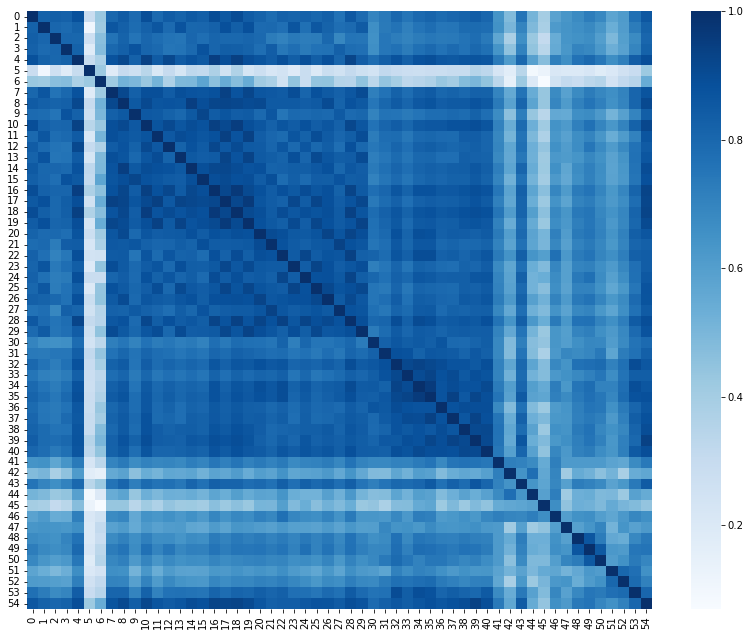

In [11]:
f = plt.figure(figsize=(14, 11))
with sns.axes_style():
    ax = f.add_subplot()
    sns.heatmap(corr, cmap="Blues",
    xticklabels=corr.columns,
    yticklabels=corr.columns)


## Let's make some models

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.60, random_state=23)
print((X_train.shape))

(68, 55)


[Text(0.5, 0.75, 'X[54] <= 0.5\ngini = 0.5\nsamples = 170\nvalue = [86, 84]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 86\nvalue = [86, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 84\nvalue = [0, 84]')]

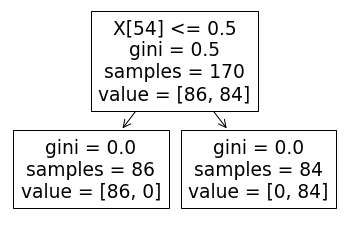

In [13]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

tree.plot_tree(clf.fit(X,y))

In [14]:
y_predict = clf.predict(X_test)
print(F"Accuracy for Decision Tree model is: {round(accuracy_score(y_test, y_predict)*100, 2)} percent")

Accuracy for Decision Tree model is: 100.0 percent


## I'm really suspicious of any model that claims to be 100% accurate.

In [15]:
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)

Perceptron()

In [16]:
y_predict = clf.predict(X_test)
print(F"Accuracy for Perceptron model is: {round(accuracy_score(y_test, y_predict)*100, 2)} percent")

Accuracy for Perceptron model is: 93.14 percent


In [17]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, y_train)
#clf.score(X_test, y_test)

In [18]:
print(F"Accuracy for Logistic Regression model is: {round(accuracy_score(y_test, y_predict)*100, 2)} percent")

Accuracy for Logistic Regression model is: 93.14 percent


## I'm also suspicious of two models with the same accuracy percentages.